<h1><font color='blue'> 9E and 9F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 9E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 

In [3]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
X.shape,y.shape

((5000, 5), (5000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [5]:
y_train.shape

(4000,)

In [6]:
# RBF_Kernel_Model = SVC(kernel='rbf', gamma=0.001,C=100)
RBF_Kernel_Model = SVC(kernel='rbf',gamma=0.001,C=100)
RBF_Kernel_Model.fit(X_train,y_train)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
RBF_Kernel_Model.support_
RBF_Kernel_Model.dual_coef_.shape

(1, 722)

In [8]:
X_train.shape

(4000, 5)

In [9]:
get_test_values = RBF_Kernel_Model.decision_function(X_test)

In [10]:
get_test_values[0]

-0.8063602054747758

In [11]:
get_alpha_values = RBF_Kernel_Model.dual_coef_[0]

In [12]:
len(RBF_Kernel_Model.support_vectors_)



722

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [13]:
def RBF_KERNEL_DECISION_FUNCTION(total_test_points):
    decision_function_values = []
    for each_point in total_test_points:
        total =0
        gamma=0.001
        intercept_val  = RBF_Kernel_Model.intercept_
        for i in range(len(RBF_Kernel_Model.support_vectors_)):
            get_sq_diff = np.linalg.norm(each_point-RBF_Kernel_Model.support_vectors_[i])**2
            rbf_kernel  = np.exp(-(gamma *get_sq_diff))
            total      += (get_alpha_values[i]*rbf_kernel) 
        decision_function_values.append(total +intercept_val)
    return decision_function_values

In [14]:
RBF_KERNEL_DECISION_FUNCTION(X_test[:5])

[array([-0.80636021]),
 array([-3.11113777]),
 array([-0.36587513]),
 array([1.89549993]),
 array([-1.15409379])]

In [15]:
RBF_Kernel_Model.decision_function(X_test[:5])

array([-0.80636021, -3.11113777, -0.36587513,  1.89549993, -1.15409379])

In [26]:
F_cv = RBF_KERNEL_DECISION_FUNCTION(X_test)
F_cv

[array([-0.80636021]),
 array([-3.11113777]),
 array([-0.36587513]),
 array([1.89549993]),
 array([-1.15409379]),
 array([-2.41478171]),
 array([-4.99665702]),
 array([0.56402146]),
 array([-2.86765192]),
 array([0.94278411]),
 array([-3.38680868]),
 array([-1.40625247]),
 array([-2.24491046]),
 array([-4.22186031]),
 array([1.36885101]),
 array([1.93041862]),
 array([2.03948558]),
 array([-2.04727233]),
 array([-0.01540417]),
 array([-2.89778054]),
 array([-1.85448129]),
 array([-2.63707739]),
 array([-3.39528853]),
 array([3.21661904]),
 array([2.3142519]),
 array([-0.71953704]),
 array([-4.20843383]),
 array([-4.19220976]),
 array([-2.47045345]),
 array([-3.27028574]),
 array([-3.47561328]),
 array([-0.24751999]),
 array([-2.18451376]),
 array([-3.14692602]),
 array([-2.33349789]),
 array([-2.89248833]),
 array([-1.36925293]),
 array([2.56061092]),
 array([-2.56076926]),
 array([-1.30771669]),
 array([-3.49289304]),
 array([1.4814673]),
 array([0.05983271]),
 array([-2.25090381]),
 

In [27]:
len(F_cv)

1000

In [17]:
# you can write your code here

<h2><font color='Geen'> 9F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value



In [29]:
N_train_plus  = len(y_test[y_test==1])
N_train_minus = len(y_test[y_test==0])
N_train_plus, N_train_minus

(286, 714)

In [30]:
y_train_plus  = (N_train_plus +1)/(N_train_plus+2)
y_train_minus = (1)/(N_train_minus+2)
y_train_plus, y_train_minus

(0.9965277777777778, 0.0013966480446927375)

In [31]:
X_test[0]

array([ 0.82794354,  0.15394785,  0.06575327,  0.08984453, -0.07298141])

In [32]:
''' sigmod function '''
def sigmoid(w,X,b):
#     print(w.shape, X.shape)
    z = np.dot(X, w)+b
    return 1/(1+np.exp(-z))

In [38]:
def log_loss(W, b, X, Y):
    N = len(X)
    sum_log = 0
    for indx in range(N):
        ''' Applying the formula '''
        if Y[indx]:
            y_value = y_train_plus
        else:
            y_value = y_train_minus
        sigmoid_value = sigmoid(W.T,X[indx],b)
        sum_log += (y_value*np.log(sigmoid_value)) + ((1-y_value)*np.log(1-sigmoid_value))
#         sum_log += ( ( item[0]*math.log(item[1],10) ) + ((1.0-item[0])*math.log(1.0-item[1],10)) )
    return (-1/N)*(sum_log)

In [42]:
total_records = len(F_cv)
w = np.zeros_like(total_records)
b = 0
eta0 = 0.0001
alpha = 0.0001
epochs = 50
F_cv_loss = []
import random
for i in range(epochs):
    for each_point in range(total_records):
        ''' Getting random index '''
        get_random_input =random.randrange(0, total_records)
        ''' calculating the error '''
        error = y_test[get_random_input] - sigmoid(w.T,F_cv[get_random_input],b)
        ''' Update weight vector '''
        w = (1- ((alpha*eta0)/total_records))*w + (alpha*F_cv[get_random_input]*
                                                   (error))
        ''' update intercept'''
        b = (b+ alpha*(y_test[get_random_input] - sigmoid(w.T,F_cv[get_random_input],b)))
    #print(w,b)
    F_cv_loss.append(log_loss(w, b,F_cv , y_test))


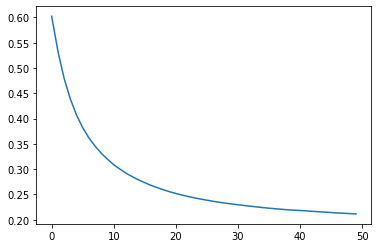

In [45]:
import matplotlib.pyplot as plt
plt.plot(F_cv_loss)
plt.show()

In [48]:
w, b

(array([1.17612304]), -0.1595876135542454)

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [58]:
F_cv[10]

array([-3.38680868])

In [59]:
ground_truth = y_test[10]

In [60]:
def get_test_point(get_x_test):
    return sigmoid(w,get_x_test,b)
propability_value = get_test_point(F_cv[10])

In [61]:
ground_truth, propability_value

(0, 0.01562874401912089)

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are including the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
